# 2. 분류문제

In [1]:
# 전처리와 시각화를 회귀문제와 분류문제에 모두 적용하기 위해 클래스를 따로 .py파일에 생성하였음
from dataset import Dataset
import eda

In [67]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    OneHotEncoder,
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from typing import Callable, Tuple

import matplotlib.pyplot as plt
import seaborn as sns

from tempfile import mkdtemp
from shutil import rmtree
import pprint
import warnings

warnings.filterwarnings(action='ignore')

## Dataset

In [3]:
path = 'dataset/classification'

In [4]:
train_set = Dataset(path, 'X_train')

[X_train]
Size: 1.86 MiB
Number of Features: 12
 |_int64 => 7
 |_object => 3
 |_float64 => 2


In [5]:
test_set = Dataset(path, 'X_test')

[X_test]
Size: 0.62 MiB
Number of Features: 12
 |_int64 => 7
 |_object => 3
 |_float64 => 2


In [6]:
train_y = pd.read_csv(f'{path}/y_train.csv')

Series([], dtype: int64)


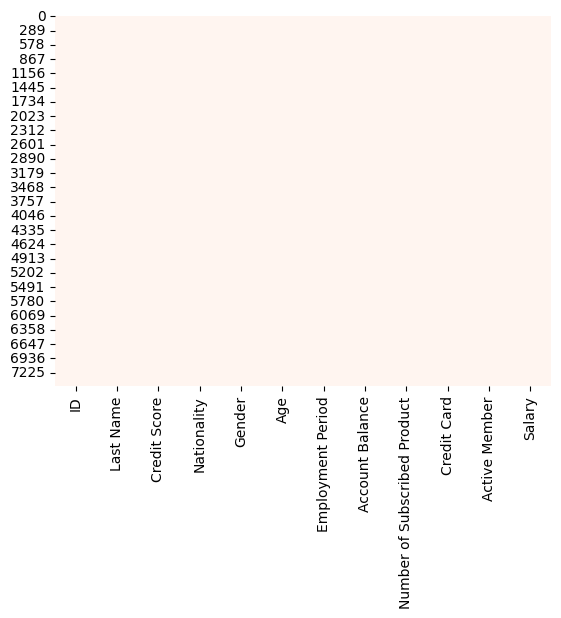

In [6]:
train_set.check_nans()

Series([], dtype: int64)


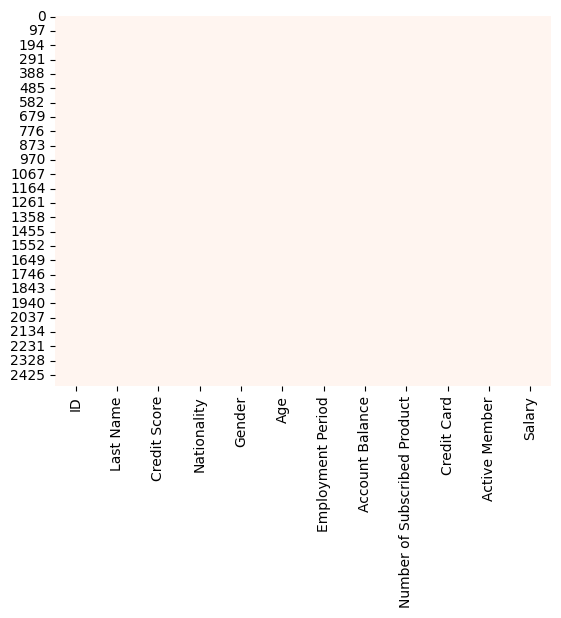

In [7]:
test_set.check_nans()

In [40]:
train_set.data

,Credit Score,Nationality,Gender,Age,Employment Period,Account Balance,Number of Subscribed Product,Credit Card,Active Member,Salary
0,662,Spain,Female,72,7,140301.72,1,0,1,179258.67
1,688,Germany,Male,45,9,103399.87,1,0,0,129870.93
2,520,Germany,Male,32,5,110029.77,1,1,0,56246.69
3,477,Spain,Female,48,2,129120.64,1,0,1,26475.79
4,592,France,Male,28,5,137222.77,1,0,0,39608.58
...,...,...,...,...,...,...,...,...,...,...
7495,712,France,Male,24,2,0.00,1,0,1,121232.51
7496,542,France,Female,42,1,0.00,1,1,1,178256.58
7497,709,France,Male,42,9,118546.71,1,0,1,77142.85
7498,721,France,Male,69,2,108424.19,1,1,1,178418.35


In [41]:
test_set.data

,Credit Score,Nationality,Gender,Age,Employment Period,Account Balance,Number of Subscribed Product,Credit Card,Active Member,Salary
0,555,Germany,Male,62,4,119817.33,1,0,1,43507.10
1,661,France,Female,37,5,136425.18,1,1,0,81102.81
2,794,France,Male,33,0,0.00,2,0,0,178122.71
3,637,Spain,Male,37,8,0.00,1,1,1,186062.36
4,632,France,Female,49,5,167962.70,1,0,0,140201.21
...,...,...,...,...,...,...,...,...,...,...
2495,723,Germany,Female,68,3,110357.00,1,0,0,141977.54
2496,769,Germany,Male,60,9,148846.39,1,1,0,192831.67
2497,655,Germany,Female,72,5,138089.97,2,1,1,99920.41
2498,814,France,Male,31,1,118870.92,1,1,0,101704.19


In [42]:
train_y

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
7495,0
7496,1
7497,0
7498,0


- `Employment Period` 컬럼은 `Age`를 고려했을 때 비상식적인것 같음

## Preprocessing

- `ID`, `Last Name`은 불필요한 정보

In [7]:
cols_to_drop = ['ID', 'Last Name']
train_set.drop_data(cols_to_drop, axis=1)
test_set.drop_data(cols_to_drop, axis=1)

Successfully dropped!
Successfully dropped!


- One Hot Encoding
    - `Nationality`, `Gender` 변수 원핫인코딩

In [8]:
cat_col = ['Nationality', 'Gender', 'Credit Card', 'Active Member']

In [9]:
train_set.data[cat_col] = train_set.data[cat_col].astype('category')
test_set.data[cat_col] = test_set.data[cat_col].astype('category')

In [10]:
numeric_col = train_set.get_dtype_col_name(['int', 'float'])

In [145]:
numerical_transform = Pipeline(
    [
        ('scaler', StandardScaler()),
    ]
)
categorical_transform = Pipeline(
    [
        ('encoder', OneHotEncoder(drop='first')),
    ]
)
column_transform = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, numeric_col),
        ('cat', categorical_transform, cat_col),
    ]
)

In [12]:
train = pd.concat([train_set.data, train_y], axis=1)

In [13]:
train.to_pickle(f'{path}/train.pkl')
test_set.data.to_pickle(f'{path}/test_X.pkl')

## EDA

### Categorical Values

In [14]:
cat_col = ['Nationality', 'Gender', 'Credit Card', 'Active Member']

Nationality: 3
Gender: 2
Credit Card: 2
Active Member: 2


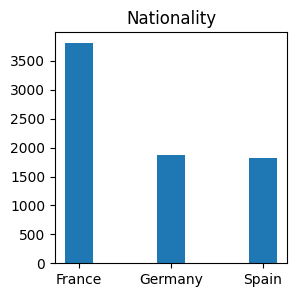

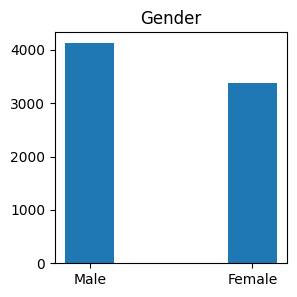

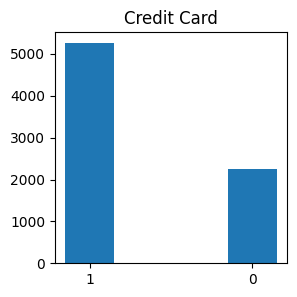

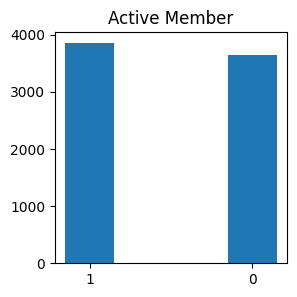

In [15]:
eda.get_categorical_info(train, cat_col, figsize=(3, 3))

Nationality: 3
Gender: 2
Credit Card: 2
Active Member: 2


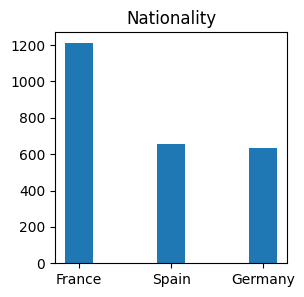

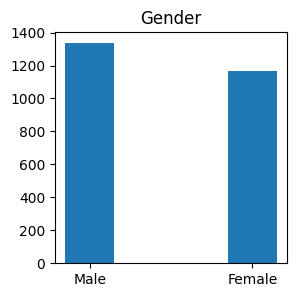

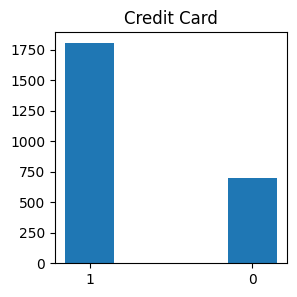

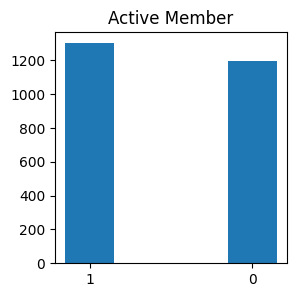

In [16]:
eda.get_categorical_info(test_set.data, cat_col, figsize=(3, 3))

### Churn Rate by Category

- 대부분 무난무난 한데 신용카드를 소유한 사용자가 더 많이 이탈한건 신기함

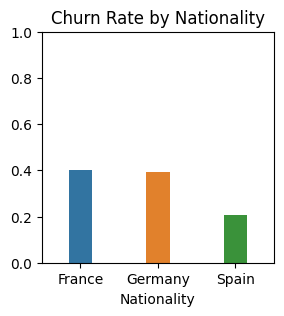

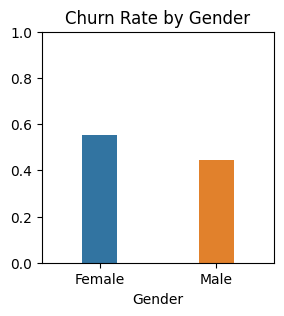

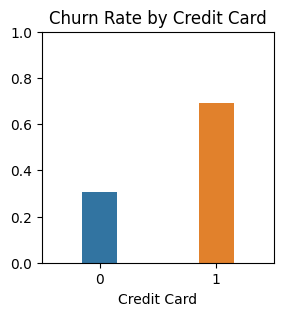

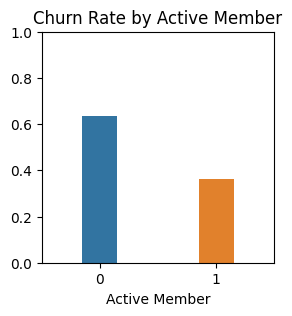

In [17]:
for col in cat_col:
    eda.plot_churn_rate(train, col, title=f'Churn Rate by {col}')

### Train y

- 클래스 불균형 문제 존재

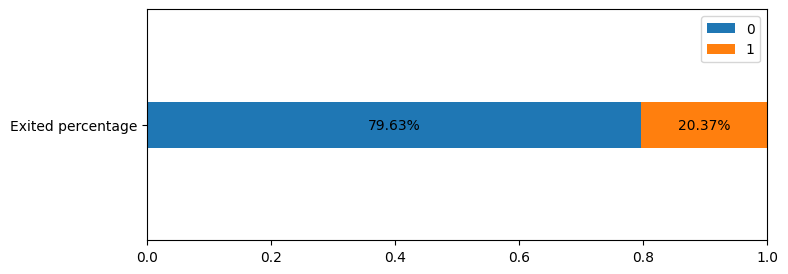

In [72]:
y_ratio = eda.get_target_percentage(train, 'Exited')

### Distributions

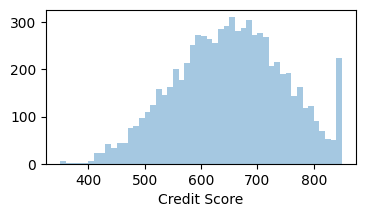

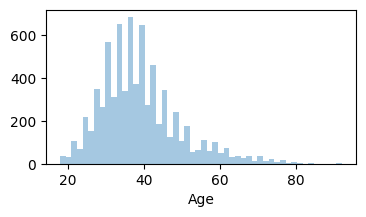

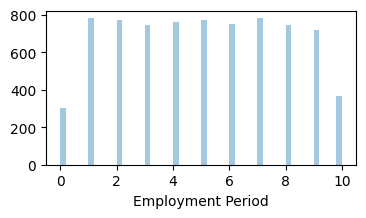

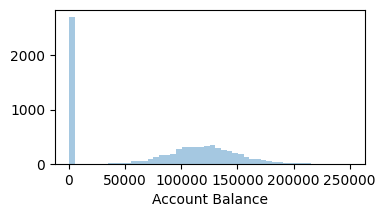

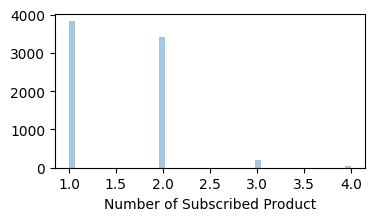

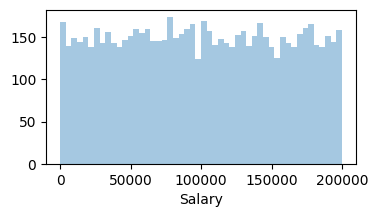

In [218]:
for col in numeric_col:
    plt.figure(figsize=(4, 2))
    sns.distplot(train_set.data[col], bins=50, kde=False);

## Feature Engineering

- 추후 교차검증시 성능을 감소시켜서 사용 하지 않음

In [18]:
def feature_engineering(df: pd.DataFrame, col_1: str, col_2: str,
                        method: Callable, name: str) -> pd.Series:
    new_feature = method(df[col_1], df[col_2])
    new_feature.name = name
    return new_feature

Train set first

In [44]:
train_set.data['Age'].describe()

count    7500.000000
mean       38.932933
std        10.471529
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [36]:
age_group_range = [0, 16, 30, 45, 100]
age_group_label = ['Child', 'YoungAdult', 'MiddleAgedAdult', 'OldAdult']
age_group = pd.cut(train_set.data['Age'], bins=age_group_range, labels=age_group_label)
age_group.name = 'AgeGroup'

- salary 변수에 대한 정보가 없으니 조심스럽게 다루자

In [43]:
train_set.data['Salary'].describe()

count      7500.000000
mean      99723.893907
std       57672.356139
min          11.580000
25%       50480.982500
50%       99344.835000
75%      149291.972500
max      199970.740000
Name: Salary, dtype: float64

In [48]:
salary_range_label = ['q1', 'q2', 'q3', 'q4']
salary_range = pd.qcut(train_set.data['Salary'], 4, labels=salary_range_label)
salary_range.name = 'SalaryRange'

In [22]:
credit_score_by_age = feature_engineering(
    df=train_set.data,
    col_1='Credit Score',
    col_2='Age',
    method=np.divide,
    name='CreditScoreByAge',
)

In [49]:
credit_score_by_salary = feature_engineering(
    df=train_set.data,
    col_1='Credit Score',
    col_2='Salary',
    method=np.divide,
    name='CreditScoreBySalary',
)

In [39]:
balance_by_salary = feature_engineering(
    df=train_set.data,
    col_1='Account Balance',
    col_2='Salary',
    method=np.divide,
    name='BalanceBySalary',
)

In [56]:
new_features_train = pd.concat([
    age_group,
    salary_range,
    credit_score_by_age,
    credit_score_by_salary,
    balance_by_salary,
], axis=1)

In [57]:
new_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AgeGroup             7500 non-null   category
 1   SalaryRange          7500 non-null   category
 2   CreditScoreByAge     7500 non-null   float64 
 3   CreditScoreBySalary  7500 non-null   float64 
 4   BalanceBySalary      7500 non-null   float64 
dtypes: category(2), float64(3)
memory usage: 191.0 KB


Test set

In [58]:
age_group = pd.cut(test_set.data['Age'], bins=age_group_range, labels=age_group_label)
age_group.name = 'AgeGroup'
salary_range = pd.qcut(test_set.data['Salary'], 4, labels=salary_range_label)
salary_range.name = 'SalaryRange'
credit_score_by_age = feature_engineering(
    df=test_set.data,
    col_1='Credit Score',
    col_2='Age',
    method=np.divide,
    name='CreditScoreByAge',
)
credit_score_by_salary = feature_engineering(
    df=test_set.data,
    col_1='Credit Score',
    col_2='Salary',
    method=np.divide,
    name='CreditScoreBySalary',
)
balance_by_salary = feature_engineering(
    df=test_set.data,
    col_1='Account Balance',
    col_2='Salary',
    method=np.divide,
    name='BalanceBySalary',
)
new_features_test = pd.concat([
    age_group,
    salary_range,
    credit_score_by_age,
    credit_score_by_salary,
    balance_by_salary,
], axis=1)

In [61]:
new_features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AgeGroup             2500 non-null   category
 1   SalaryRange          2500 non-null   category
 2   CreditScoreByAge     2500 non-null   float64 
 3   CreditScoreBySalary  2500 non-null   float64 
 4   BalanceBySalary      2500 non-null   float64 
dtypes: category(2), float64(3)
memory usage: 64.0 KB


In [62]:
train_X = pd.concat([train_set.data, new_features_train], axis=1)
test_X = pd.concat([test_set.data, new_features_test], axis=1)

In [141]:
train_X = train_set.data
test_X = test_set.data

In [142]:
cat_col = train_X.select_dtypes('category').columns

In [144]:
numeric_col = train_X.select_dtypes(['int', 'float']).columns

In [55]:
new_features_train.to_pickle(f'{path}/new_features_train.pkl')
new_features_test.to_pickle(f'{path}/new_features_test.pkl')

## Model

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

In [65]:
n_splits = 10
n_iter = 100

### Decision Tree

In [146]:
cache_dir = mkdtemp()

model = DecisionTreeClassifier()
metric = 'f1'
cv = KFold(n_splits)

classifier = Pipeline(
    [
        ('preprocessor', column_transform),
        ('classifier', model),
    ],
    memory=cache_dir,
)
params = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__splitter': ['random', 'best'],
    'classifier__max_leaf_nodes': np.arange(100, 1000, 100),
    'classifier__max_depth': np.arange(1000, 6000, 1000),
    'classifier__min_samples_split': np.arange(100, 500, 50),
    'classifier__max_features': np.arange(0.5, 1, 0.1),
}

search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=n_iter,
    scoring=metric,
    n_jobs=-1,
    cv=cv,
)

search.fit(train_X, train_y)

best_param = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_
cv_history = search.cv_results_  # for debugging

print(best_param)
print(best_score)

rmtree(cache_dir)

{'classifier__splitter': 'random', 'classifier__min_samples_split': 150, 'classifier__max_leaf_nodes': 600, 'classifier__max_features': 0.8999999999999999, 'classifier__max_depth': 1000, 'classifier__criterion': 'gini', 'classifier__class_weight': 'balanced'}
0.5749716925884939


In [147]:
dt_pred = best_estimator.predict(test_X)

### K-Nearest Neighbors Classifer

In [148]:
cache_dir = mkdtemp()

model = KNeighborsClassifier()
metric = 'f1'
cv = KFold(n_splits)

classifier = Pipeline(
    [
        ('preprocessor', column_transform),
        ('classifier', model),
    ],
    memory=cache_dir,
)
params = {
    'classifier__n_neighbors': np.arange(1, 10, 1),
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'classifier__weights' : ['uniform', 'distance'],
    'classifier__metric' : ['minkowski', 'euclidean', 'manhattan'],
}

search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=n_iter,
    scoring=metric,
    n_jobs=-1,
    cv=cv,
)

search.fit(train_X, train_y)

best_param = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_
cv_history = search.cv_results_  # for debugging

print(best_param)
print(best_score)

rmtree(cache_dir)

{'classifier__weights': 'uniform', 'classifier__n_neighbors': 5, 'classifier__metric': 'minkowski', 'classifier__algorithm': 'auto'}
0.5165393727617802


In [149]:
knn_pred = best_estimator.predict(test_X)

### Logistic Regression

In [66]:
cache_dir = mkdtemp()

model = LogisticRegression()
metric = 'f1'
cv = KFold(n_splits)

classifier = Pipeline(
    [
        ('preprocessor', column_transform),
        ('classifier', model),
    ],
    memory=cache_dir,
)
params = {
    'classifier__C': np.arange(0.1, 10, 0.1),
    'classifier__class_weight': [None, 'balanced'],
    'classifier__penalty' : ['l2', None],
    'classifier__max_iter': np.arange(100, 1000, 100),
}

search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=n_iter,
    scoring=metric,
    n_jobs=-1,
    cv=cv,
)

search.fit(train_X, train_y)

best_param = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_
cv_history = search.cv_results_  # for debugging

print(best_param)
print(best_score)

rmtree(cache_dir)

{'classifier__penalty': 'l2', 'classifier__max_iter': 400, 'classifier__class_weight': 'balanced', 'classifier__C': 0.8}
0.48970718820843573


비선형 로지스틱 회귀 실험

In [152]:
numerical_transform = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()),
    ]
)
categorical_transform = Pipeline(
    [
        ('encoder', OneHotEncoder(drop='first')),
    ]
)
column_transform = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, numeric_col),
        ('cat', categorical_transform, cat_col),
    ]
)

In [153]:
cache_dir = mkdtemp()

model = LogisticRegression()
metric = 'f1'
cv = KFold(n_splits)

classifier = Pipeline(
    [
        ('preprocessor', column_transform),
        ('classifier', model),
    ],
    memory=cache_dir,
)
params = {
    'classifier__C': np.arange(0.1, 1, 0.1),
    'classifier__class_weight': [None, 'balanced'],
    'classifier__penalty' : ['l2', None],
    'classifier__max_iter': np.arange(100, 1000, 100),
}

search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=n_iter,
    scoring=metric,
    n_jobs=-1,
    cv=cv,
)

search.fit(train_X, train_y)

best_param = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_
cv_history = search.cv_results_  # for debugging

print(best_param)
print(best_score)

rmtree(cache_dir)

{'classifier__penalty': None, 'classifier__max_iter': 700, 'classifier__class_weight': 'balanced', 'classifier__C': 0.3}
0.5610429235080627


In [154]:
lr_pred = best_estimator.predict(test_X)

- `PolynomialFeatures`로 변수를 다항식 형태로 변환후 성능이 대폭 향상됨

## Submission File

In [162]:
dt_submit = pd.DataFrame(dt_pred, columns=['DT 예측'])
knn_submit = pd.DataFrame(knn_pred, columns=['KNN 예측'])
lr_submit = pd.DataFrame(lr_pred, columns=['LR 예측'])

In [163]:
classification_pred = pd.concat([dt_submit, knn_submit, lr_submit], axis=1)
classification_pred.to_csv('prediction/classification_pred.csv', index=False, encoding='euc-kr')